In [1]:
% matplotlib inline
% load_ext autoreload
! pip install git+https: // github.com / avivajpeyi / pspline_psd.git -q

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 14, in <module>
        File "/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/setuptools/__init__.py", line 18, in <module>
          from setuptools.dist import Distribution
        File "/Users/avaj0001/Documents/projects/deep_gw_pe_followup/venv/lib/python3.9/site-packages/setuptools/dist.py", line 32, in <module>
          from setuptools.extern.more_itertools import unique_everseen
        File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
        File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
        File "<frozen importlib._bootstrap>", line 666, in _load_unlocked
        File "<frozen importlib._bootstrap>", line 565, in module_f

# Example: LISA White Dwarf background

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following fa

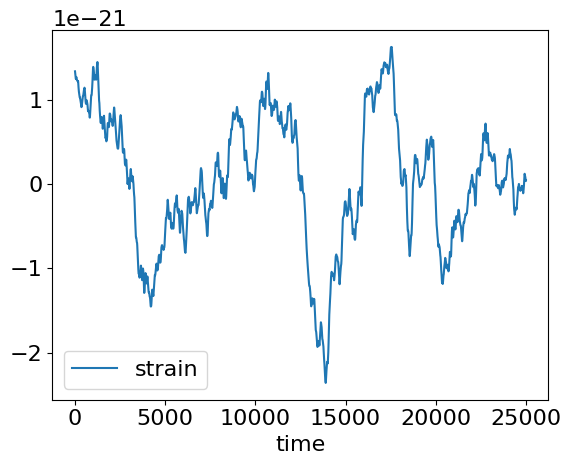

In [38]:
import numpy as np
import pandas as pd
import os

import urllib.request

DATA_URL = "https://gist.githubusercontent.com/avivajpeyi/67c3129ac75e6e9da1f75209de7ec5fe/raw/849ee5a2bee139ac0cdcce10720630d7a668a92d/lisa_wd_strain"


def load_data():
    """Load data from disk if available, otherwise download it."""
    if not os.path.exists("lisa_wd_strain"):
        # download data
        urllib.request.urlretrieve(DATA_URL, "lisa_wd_strain")

    data = np.loadtxt("lisa_wd_strain", delimiter=" ")
    dt = 5.00000079
    time = np.arange(0, len(data) * dt, dt)
    data = pd.DataFrame({"time": time, "strain": data})
    return data


data = load_data()
# only use first 5000 points
data = data.iloc[:5000]
data.plot(x="time", y="strain");

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


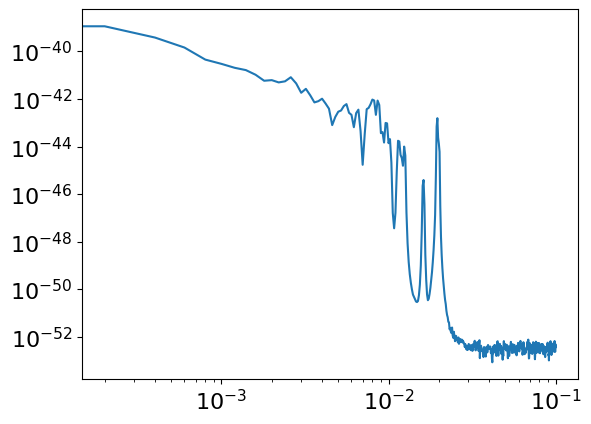

In [40]:
## scipy PSD estimate
from scipy.signal import welch
import matplotlib.pyplot as plt

freq, pdgrm = welch(data.strain.values, fs=1 / 5.00000079, nperseg=1000)
plt.loglog(freq, pdgrm)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


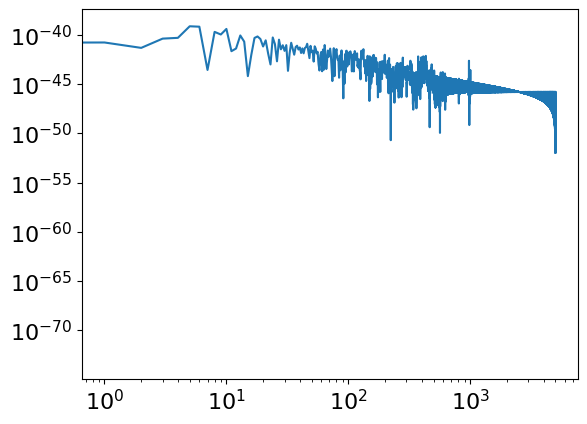

In [42]:
from slipper.fourier_methods import get_periodogram

pdgrm = get_periodogram(timeseries=data.strain.values)
plt.loglog(pdgrm)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following fa

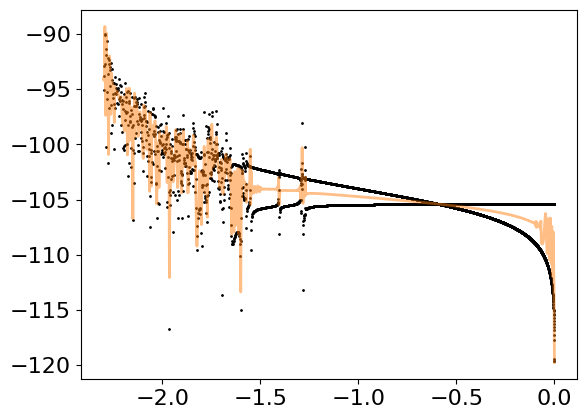

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

x = np.linspace(0.1, 1, len(pdgrm))
log_x = np.log(x)[1:]
log_pdgrm = np.log(pdgrm)[1:]
spl = UnivariateSpline(log_x, log_pdgrm)
log_xs = np.linspace(min(log_x), max(log_x), 1000)
plt.plot(log_x, log_pdgrm, 'ko', ms=1)
plt.plot(log_xs, spl(log_xs), 'tab:orange', lw=2, alpha=0.5)


In [34]:
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model

mcmc = fit_data_with_pspline_model(
    data=pdgrm,
    Ntotal=2000,
    burnin=1000,
    degree=3,
    eqSpaced=False,
)

|Slipper|15/09 14:31:43|INFO| Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 2000,
 'burnin': 1000,
 'n_checkpoint_plts': 0,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3, 'diffMatrixOrder': 2, 'eqSpaced': False, 'k': 30}



MCMC sampling:   0%|          | 0/1999 [00:00<?, ?it/s]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found

findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans
findfont: Generic family 'sans-serif' not found because none of the following families were found: Liberation Sans


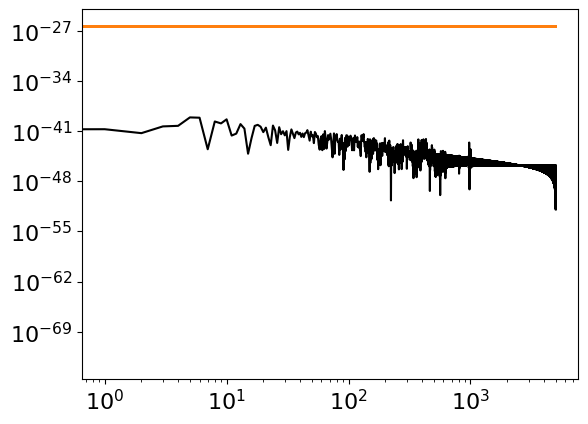

In [56]:
from slipper.plotting.plot_spline_model_and_data import plot_spline_model_and_data

idxes = np.random.choice(range(len(mcmc.psd_posterior)), size=100)
spline_models = [mcmc.psd_posterior[idx] for idx in idxes]
for spline in spline_models:
    plt.loglog(spline, color="tab:orange", alpha=0.1)

plt.loglog(pdgrm, color="k")

In [50]:
dir(mcmc)

['_Result__posterior',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_burn_in',
 '_psd_quant',
 'all_samples',
 'basis',
 'burn_in',
 'compile_idata_from_sampling_results',
 'create_idata',
 'data',
 'data_length',
 'get_model_quantiles',
 'idata',
 'k',
 'knots',
 'load',
 'logged_splines',
 'make_summary_plot',
 'n_steps',
 'post_samples',
 'psd_posterior',
 'psd_quantiles',
 'sample_stats',
 'save',
 'weights']